# Import the prepared data and required libraries

In this part of the project we will compare different statistical learning algorithms on the already prepared dataset.
We use cross validation for all models. Furthermore the confusion matrix is plotet for each trained model to be able to review false positive and false negative classification results.

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
df_train = pd.read_csv('prepared_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null int64
Q              889 non-null int64
S              889 non-null int64
dtypes: float64(2), int64(8)
memory usage: 69.5 KB


In the following lines of code the dataset is split into a train and a (for the model unknown) test dataset.

In [58]:
X = df_train.drop('Survived',axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision tree model

We start with a decision tree. Although this model is probably outperformed, due to the ability to visualize the trained decions we can infer some underlying rules from a decision tree.

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
predictions = dtree.predict(X_test)

Here we print the training results for the decision tree.

In [62]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[138  30]
 [ 24  75]]


             precision    recall  f1-score   support

          0       0.85      0.82      0.84       168
          1       0.71      0.76      0.74        99

avg / total       0.80      0.80      0.80       267



As we can see from the results the models overall accuracy is 78% and it predicts generally speaking "deceased" better than "survived".

Next Up we show the actual decisiontreee from the model.
Note this requires that Graphviz si installed on your computer. Visit https://graphviz.gitlab.io/download/
for more information on how to install Graphviz.

In [63]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X)
features

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

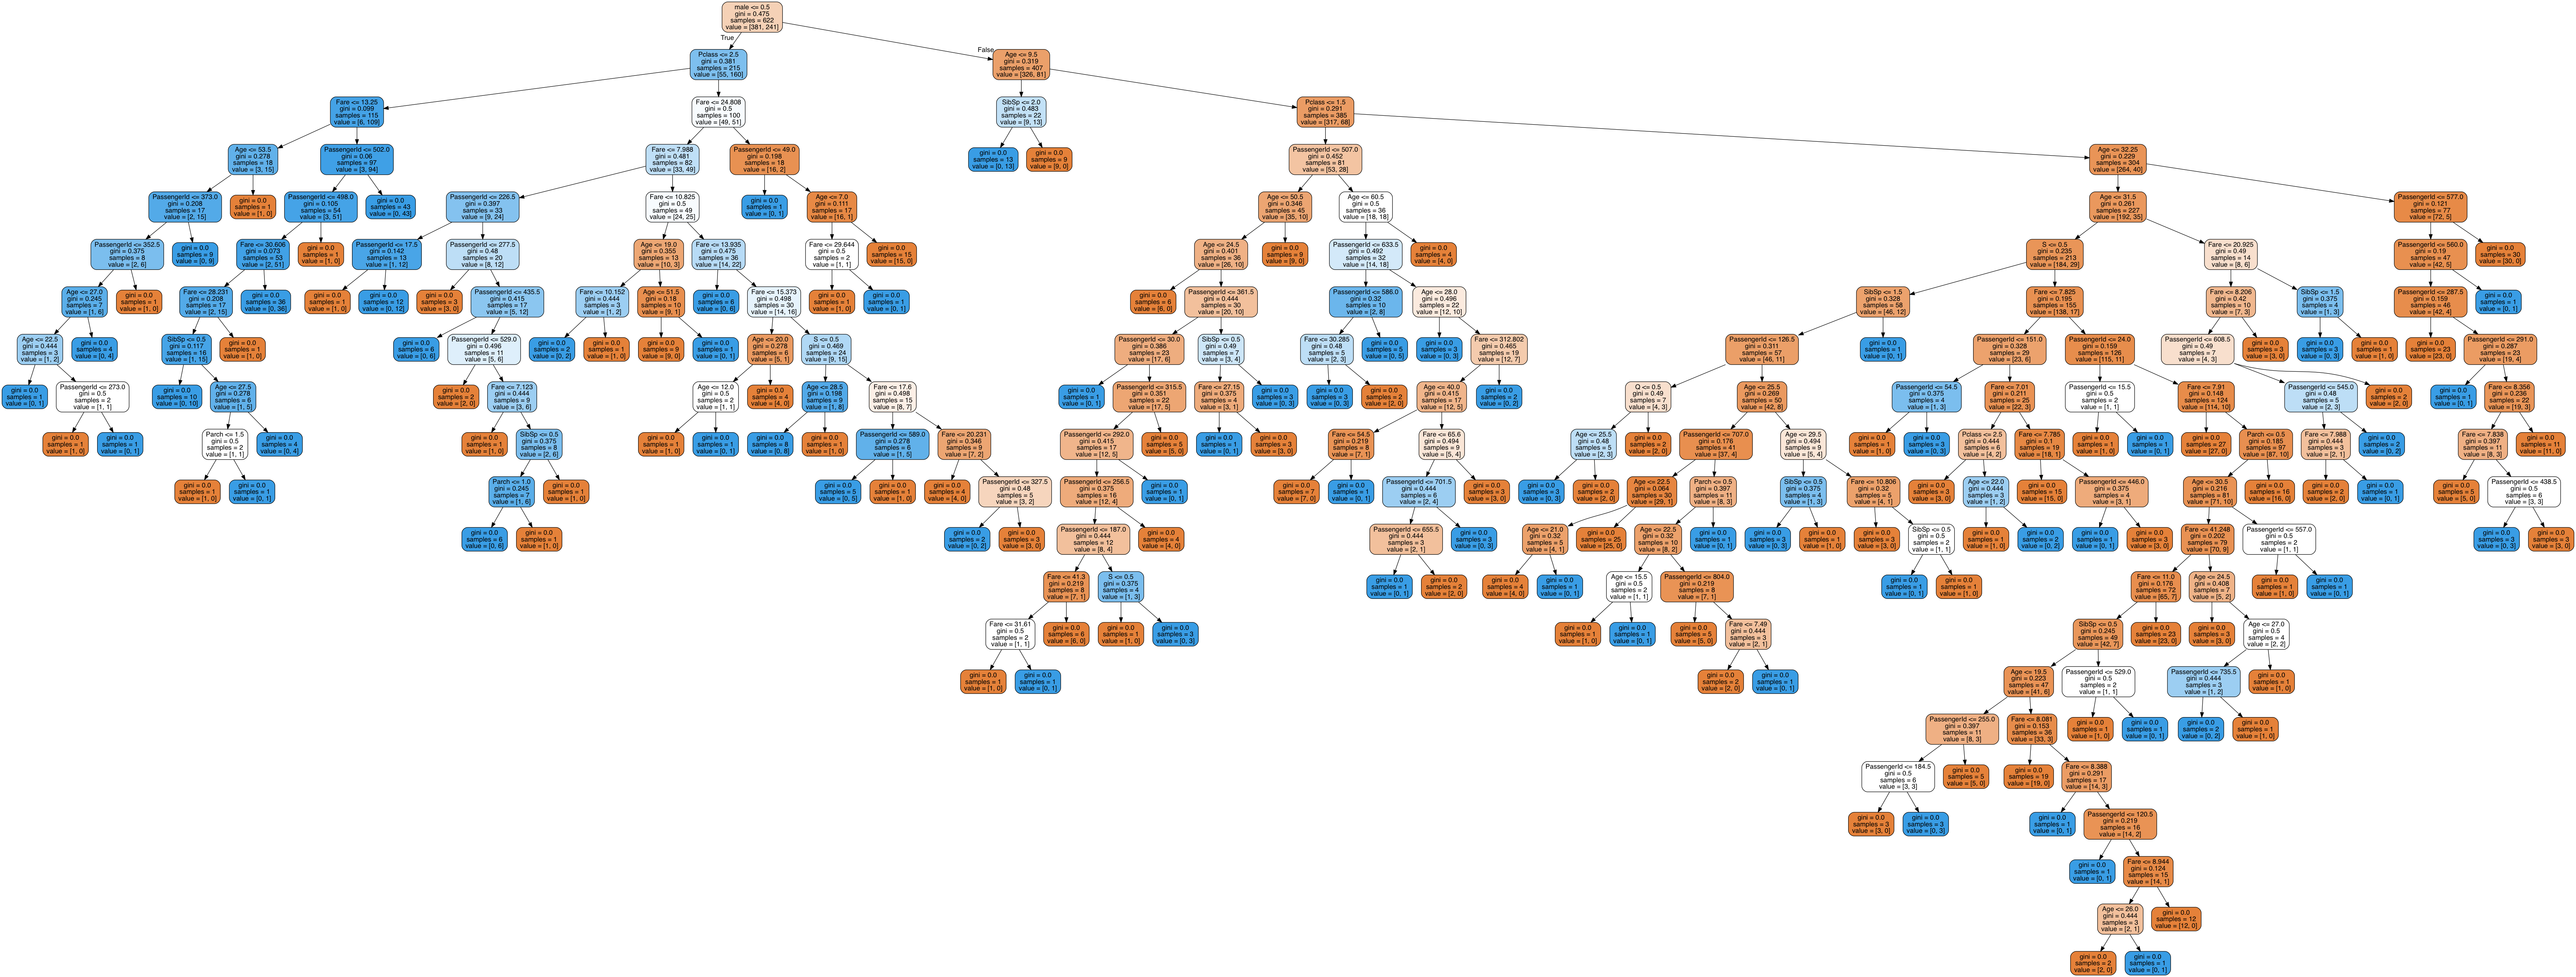

In [64]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

From the visualization we can see one thing clearly and that is that the column 'male' is the strongest predictor in the dataset. This is because it was choosen for the first decision.
Note that in each decision only one column is used.

# Random Forest model

What is better than one tree. You guessed right many trees or a forest.
Here we use 100 decision trees and combine the results to improve the prediction accuracy.

Random in the context of a Random Forest classifier is twofold. Each decision tree gets a subset of 1/100 of the size of the training data. Furthermore to ensure that the strong predictor seen on the decision tree visualization is not always present for each decision tree. Each tree only get a subset the column. Lets denote p as the count of columns.
This approach uses sqrt(p) features for each decision. This is necessary because if all 100 decision trees had access to all columns they would all decide similary. Which would result in a model of 100 decision trees that is not much better than a single decision tree.

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[152  16]
 [ 20  79]]


             precision    recall  f1-score   support

          0       0.88      0.90      0.89       168
          1       0.83      0.80      0.81        99

avg / total       0.86      0.87      0.86       267



If we compare the results from the Random Forest to the decision tree we see that we have increased the accuracy by 0.3%

# Support Vektor Machines

One of the more complex statistical learning algorithms are support vector machines. 
Although the uasge of the model is very similar to the decision tree based aproaches earlier a lot more is going on under the hood during the training.

In [67]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[165   3]
 [ 99   0]]


             precision    recall  f1-score   support

          0       0.62      0.98      0.76       168
          1       0.00      0.00      0.00        99

avg / total       0.39      0.62      0.48       267



In [69]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[145  23]
 [ 28  71]]


             precision    recall  f1-score   support

          0       0.84      0.86      0.85       168
          1       0.76      0.72      0.74        99

avg / total       0.81      0.81      0.81       267



In [70]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 24 144]
 [  1  98]]


             precision    recall  f1-score   support

          0       0.96      0.14      0.25       168
          1       0.40      0.99      0.57        99

avg / total       0.75      0.46      0.37       267



# Neural Network (scikit-learn)

Last but not least we use a multilayer perceptron for the classification.

In [85]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 50, 20), random_state=1)
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [86]:
predictions = clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[156  12]
 [ 60  39]]


             precision    recall  f1-score   support

          0       0.72      0.93      0.81       168
          1       0.76      0.39      0.52        99

avg / total       0.74      0.73      0.70       267

